In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置中文字体（以SimHei为例）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

In [2]:
excel_file_path = '分类日销售量、日均利率、日利润.xlsx'

data_1 = pd.read_excel(excel_file_path, sheet_name=0)
data_2 = pd.read_excel(excel_file_path, sheet_name=1)
data_3 = pd.read_excel(excel_file_path, sheet_name=2)
data_4 = pd.read_excel(excel_file_path, sheet_name=3)
data_5 = pd.read_excel(excel_file_path, sheet_name=4)
data_6 = pd.read_excel(excel_file_path, sheet_name=5)

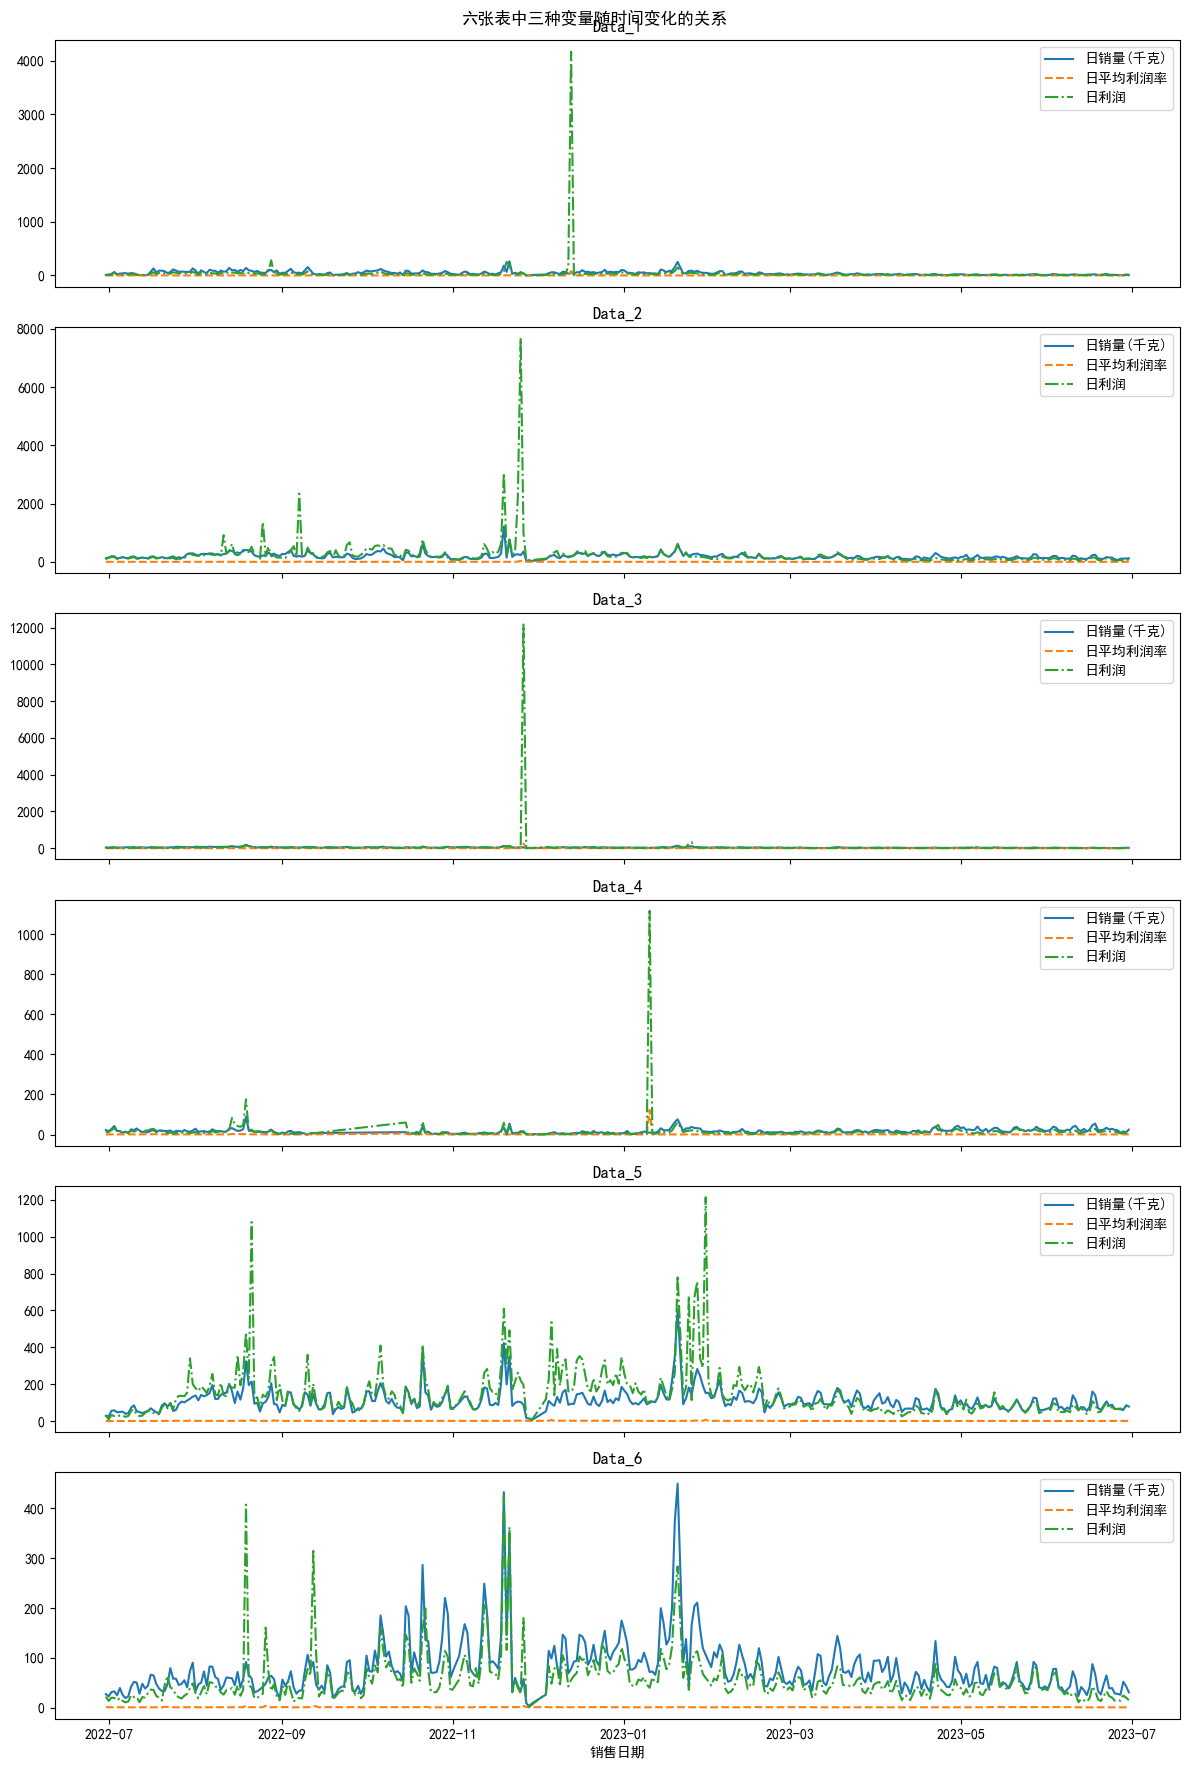

In [5]:
# 创建一个包含六个子图的布局
fig, axes = plt.subplots(6, 1, figsize=(12, 18), sharex=True)

# 假设data_1到data_6分别是包含销售日期、日销量、日平均利润率、日利润的DataFrame
data_frames = [data_1, data_2, data_3, data_4, data_5, data_6]

# 遍历每张表，为每个子图绘制折线图
for i, data in enumerate(data_frames):
    ax = axes[i]  # 获取当前子图
    
    # 绘制销售日期与日销量(千克)的折线图
    ax.plot(data['销售日期'], data['日销量(千克)'], label='日销量(千克)', linestyle='-')
    
    # 绘制销售日期与日平均利润率的折线图
    ax.plot(data['销售日期'], data['日平均利润率'], label='日平均利润率', linestyle='--')
    
    # 绘制销售日期与日利润的折线图
    ax.plot(data['销售日期'], data['日利润'], label='日利润', linestyle='-.')
    
    # 设置子图标题
    ax.set_title(f'Data_{i + 1}')
    
    # 添加图例
    ax.legend()

# 共享x轴标签
plt.xlabel('销售日期')

# 添加整体标题
plt.suptitle('六张表中三种变量随时间变化的关系')

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [7]:
def timeseries_evaluation_fun(y_true,y_pred):
    def mean_absolute_percentage_error(y_true,y_pred):
        y_true,y_pred = np.array(y_true),np.array(y_pred)
        return np.mean(np.abs((y_true-y_pred)/y_true))*100
    print('Evakuation metric results:')
    print(f'MSE is :{metrics.mean_squared_error(y_true,y_pred)}') 
    print(f'MAE is :{metrics.mean_absolute_error(y_true,y_pred)}')
    print(f'RMSE is :{np.sqrt(metrics.mean_squared_error(y_true,y_pred))}')
    print(f'MAPE is :{mean_absolute_percentage_error(y_true,y_pred)}')
    print(f"R2 is :{metrics.r2_score(y_true,y_pred)}",end='\n\n')

def adf_test_func(series,column_name):
    print(f'Results of DF test for column: {column_name}')
    dftest = adfuller(series,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values(%s)'%key] = value
    print(dfoutput)
    if dftest[1]<=0.05:
        print('Conclusion: ----->')
        print('Reject the null hypothesis')
        print('Data is stationary')
    else:
        print('Conclusion: ----->')
        print('Fail to reject the null hypothesis')
        print('Data is non-stationary')

In [6]:
data_1.head(10)

,销售日期,日平均利润率,日销量(千克),日利润
0,2022-06-30,0.471955,10.625,5.014520
1,2022-07-01,0.533035,15.086,8.041362
2,2022-07-02,0.580795,28.667,16.649663
3,2022-07-03,0.885647,63.873,56.568949
4,2022-07-04,0.527175,20.219,10.658953
5,2022-07-05,0.529928,34.508,18.286756
6,2022-07-06,0.486617,39.018,18.986812
7,2022-07-07,0.505096,43.066,21.752482
8,2022-07-08,0.504589,32.713,16.506619
9,2022-07-09,0.605953,44.378,26.890982


In [4]:
print(data_1.describe())
print(data_2.describe())
print(data_3.describe())
print(data_4.describe())
print(data_5.describe())
print(data_6.describe())

           日平均利润率     日销量(千克)          日利润
count  359.000000  359.000000   359.000000
mean     0.799649   43.669100    36.118734
std      4.343580   35.407519   220.323392
min      0.230769    1.809000     0.730385
25%      0.463112   16.869500     9.867216
50%      0.531637   33.861000    17.483935
75%      0.610632   61.163500    30.824688
max     82.600030  264.657000  4165.849910
           日平均利润率      日销量(千克)          日利润
count  359.000000   359.000000   359.000000
mean     1.129967   194.075011   236.092468
std      1.918468   101.712578   475.189373
min      0.399827    31.298000    42.420559
25%      0.659177   131.799000    98.934368
50%      0.914306   169.963000   150.928216
75%      1.146951   240.137000   248.212209
max     33.552441  1213.473000  7676.664273
           日平均利润率     日销量(千克)           日利润
count  359.000000  359.000000    359.000000
mean     1.355215   39.616047     61.066194
std     13.517420   23.792514    641.473734
min      0.127261    3.192000      1.7915

In [7]:
# 定义一个函数来删除异常值并返回新的DataFrame
def remove_outliers(df):
    Q1 = df["日平均利润率"].quantile(0.25)  # 计算第一四分位数
    Q3 = df["日平均利润率"].quantile(0.75)  # 计算第三四分位数
    IQR = Q3 - Q1  # 计算四分位间距

    # 根据IQR原则删除异常值
    df_filtered = df[(df["日平均利润率"] >= Q1 - 1.5 * IQR) & (df["日平均利润率"] <= Q3 + 1.5 * IQR)]

    return df_filtered

# 删除异常值并存储新的DataFrame
data_1 = remove_outliers(data_1)
data_2 = remove_outliers(data_2)
data_3 = remove_outliers(data_3)
data_4 = remove_outliers(data_4)
data_5 = remove_outliers(data_5)
data_6 = remove_outliers(data_6)

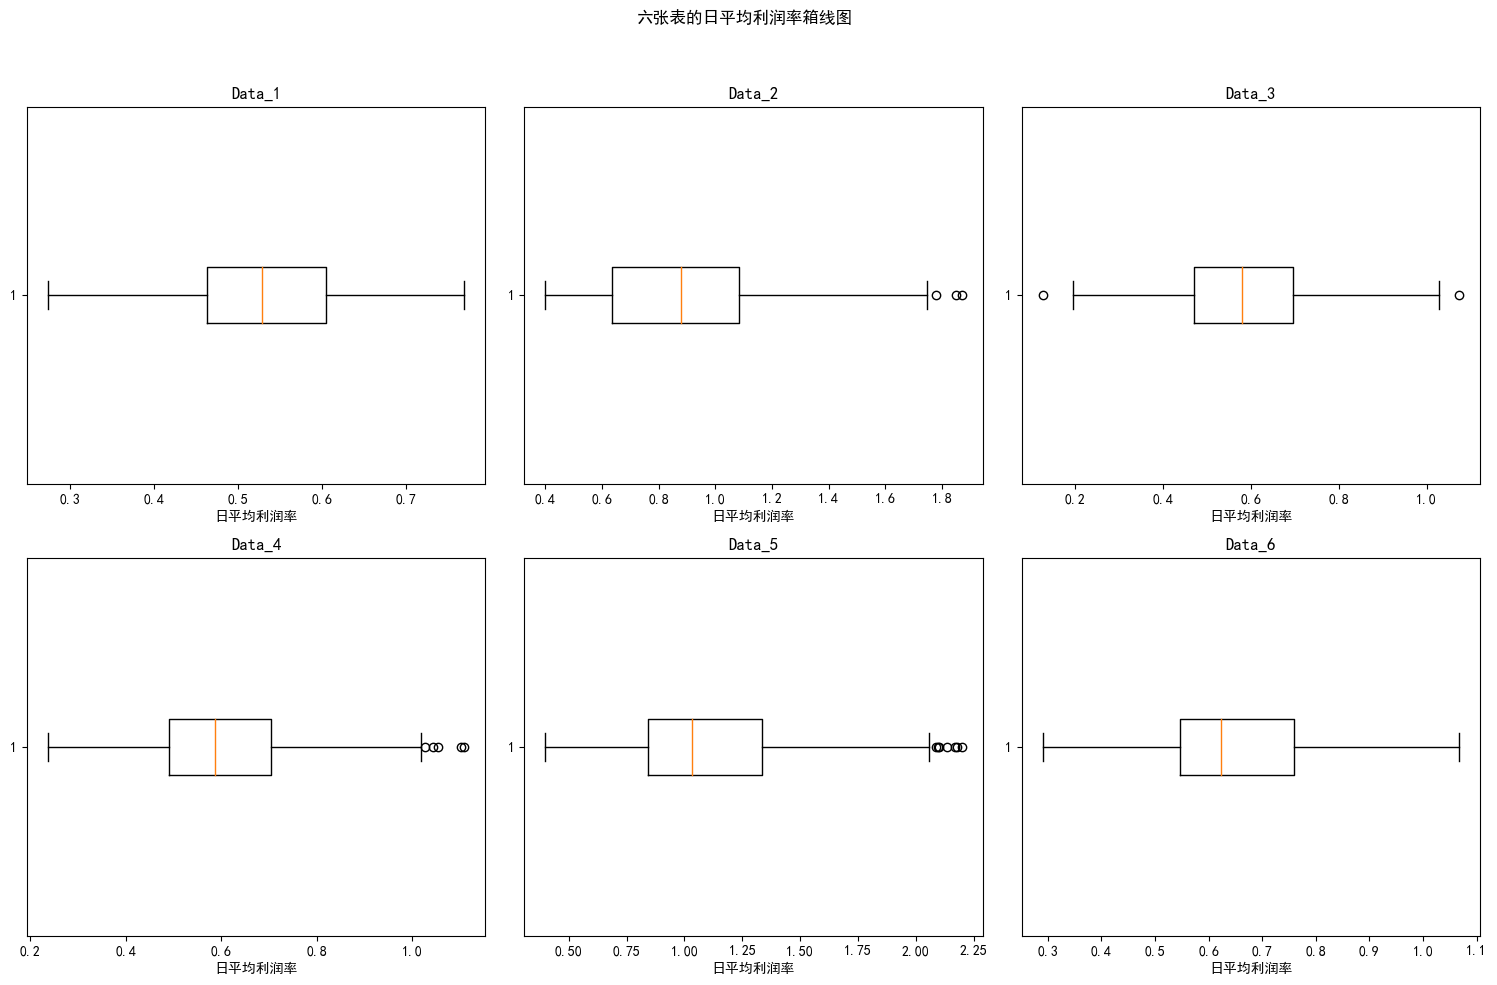

In [8]:
# 创建一个包含六个子图的布局
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('六张表的日平均利润率箱线图')

# 将子图的Axes对象放入一个列表中，以便迭代
axes_list = [axes[0, 0], axes[0, 1], axes[0, 2], axes[1, 0], axes[1, 1], axes[1, 2]]

# 遍历每个数据框并为每个子图绘制箱线图
for i, data in enumerate([data_1, data_2, data_3, data_4, data_5, data_6]):
    ax = axes_list[i]
    
    # 选择日平均利润率列的数据
    profit_rate_data = data['日平均利润率']
    
    # 绘制箱线图
    ax.boxplot(profit_rate_data, vert=False)
    
    # 设置子图标题
    ax.set_title(f'Data_{i + 1}')
    
    # 设置横轴标签
    ax.set_xlabel('日平均利润率')

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()

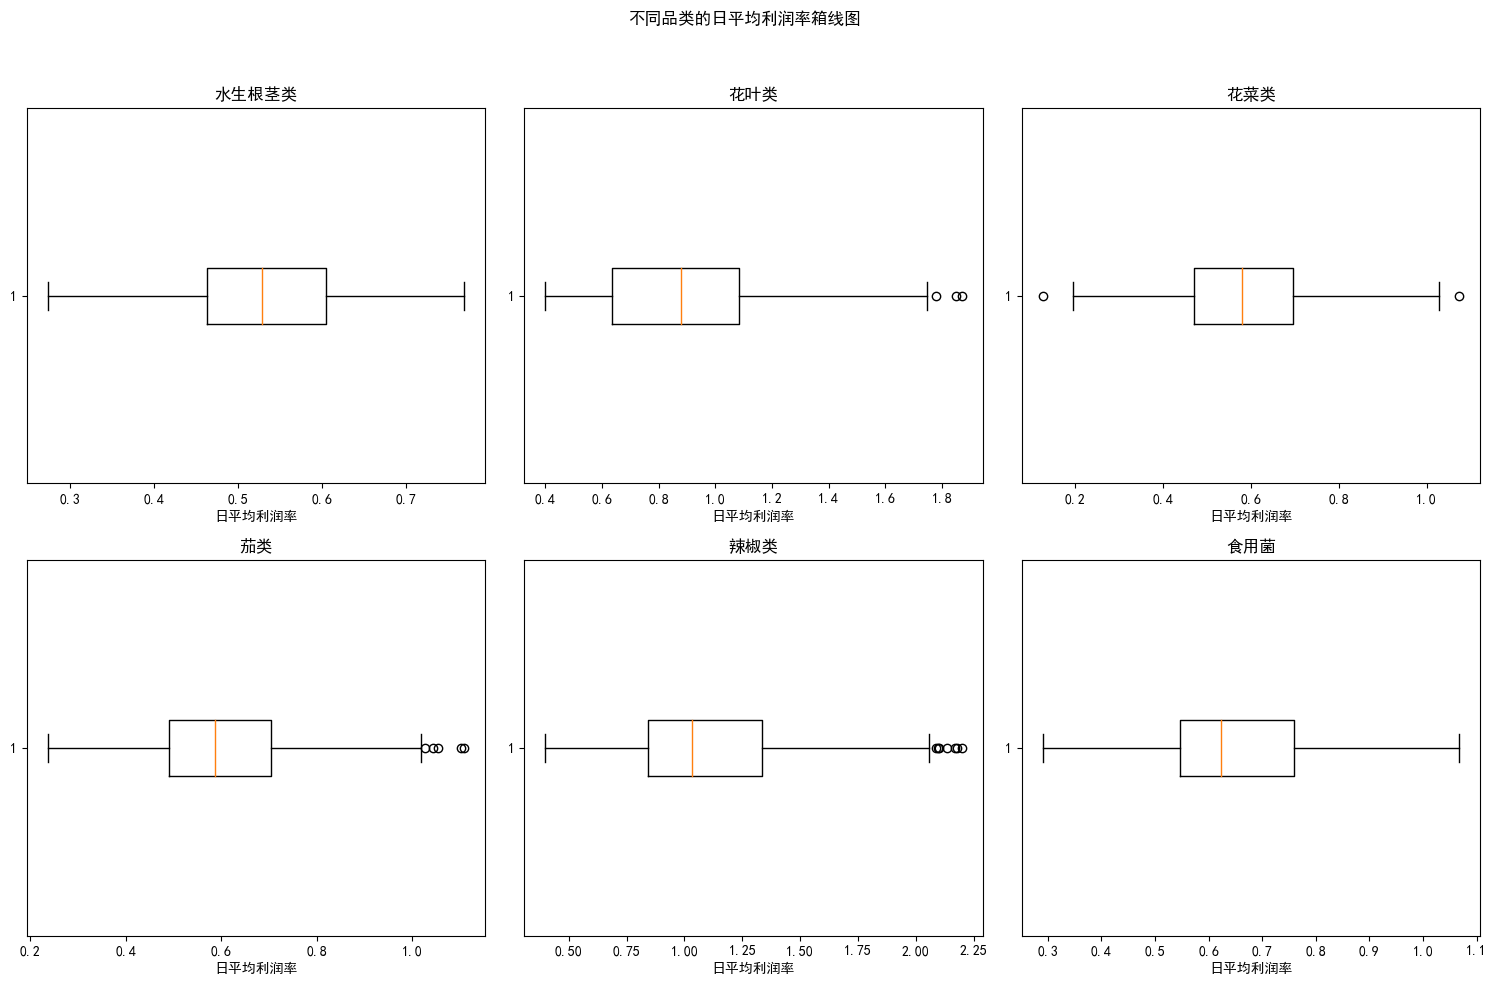

In [10]:
# 创建一个包含六个子图的布局
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('不同品类的日平均利润率箱线图')

# 将子图的Axes对象放入一个列表中，以便迭代
axes_list = [axes[0, 0], axes[0, 1], axes[0, 2], axes[1, 0], axes[1, 1], axes[1, 2]]

# 为每个子图设置名称
subplot_names = ["水生根茎类", "花叶类", "花菜类", "茄类", "辣椒类", "食用菌"]

# 遍历每个数据框并为每个子图绘制箱线图，并设置名称
for i, data in enumerate([data_1, data_2, data_3, data_4, data_5, data_6]):
    ax = axes_list[i]
    
    # 选择日平均利润率列的数据
    profit_rate_data = data['日平均利润率']
    
    # 绘制箱线图
    ax.boxplot(profit_rate_data, vert=False)
    
    # 设置子图标题
    ax.set_title(subplot_names[i])
    
    # 设置横轴标签
    ax.set_xlabel('日平均利润率')

# 调整子图之间的间距
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()
